<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Missing Data
---

### Learning Objectives
- Define MCAR, MAR, and NMAR.
- Describe various strategies for dealing with missing data.
- Understand the assumptions we make when using strategies to handle missing data.

### Credit
This lesson is adapted from a missing data workshop that Matt Brems presented at the Open Data Science Conference ([ODSC](https://odsc.com/)).  Check out his GitHub repo [here](https://github.com/matthewbrems/missing-data-workshop?fbclid=IwAR1LGjaIen-ITLndPN1ODV1lYZBvxsHDs0DgIaPkuxpXMsQRBT8eAPI-0sI).

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Set random seed.
np.random.seed(42)

In [13]:
# Bring in our data of age, partnered, children, and income data
# where income is linearly related to age, partnered, and children.
income = pd.read_csv('data/income.csv') 
income_missing = pd.read_csv('data/income_missing.csv') 

# Check out first 10 rows
income_missing

,children,age,partnered,income
0,1,35.0,1,56531.361287
1,2,58.0,1,93026.182530
2,0,49.0,1,42693.010819
3,0,44.0,1,83680.128218
4,1,26.0,0,28845.520835
...,...,...,...,...
95,1,40.0,1,74090.088031
96,1,41.0,1,52304.403273
97,3,37.0,0,10688.919618
98,4,NaN,0,68232.834868


In [14]:
# create a function to compare histograms of original & imputed data
def compare_histograms(imputed_column, original_column, x_label, y_label = 'Frequency'):
    fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (16,9))

    # Set axes of histograms.
    mode = statistics.mode(imputed_column)
    rnge = max(original_column) - min(original_column)
    xmin = min(original_column) - 0.02 * rnge
    xmax = max(original_column) + 0.02 * rnge
    ymax = 40

    ax0.set_xlim(xmin, xmax)
    ax0.set_ylim(0, ymax)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)

    # Set top labels.
    ax0.set_title('Real Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax0.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax0.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax0.set_xticks([])
    ax0.set_yticks([])

    # Generate top histogram.
    ax0.hist(original_column, bins = 15, color = '#185fad', alpha = 0.75, label = '')
    ax0.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax0.legend(prop={'size': 15}, loc = 1)

    # Set bottom labels.
    ax1.set_title('Imputed Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax1.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax1.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Generate bottom histogram.
    ax1.hist(imputed_column, bins = 15, color = 'orange', alpha = 0.75, label = '', stacked = True)
    ax1.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax1.axvline(np.mean(imputed_column), color = 'darkorange', lw = 5, label = 'Imputed Mean')
    ax1.legend(prop={'size': 15}, loc = 1)

    plt.tight_layout();

### Method 1: Deductive Imputation

We use logical rules to fill in missing values.
- Survey asks if the respondent was the victim of a crime in the last twelve months.
- Respondent says no.
- Survey then asks if the respondent was the victim of a violent crime in the last twelve months.
- Respondent leaves this answer blank.

**Pros**:
- Can be used regardless of missingness type
- Requires no inference

**Cons**:
- Requires specific coding
- Can be time consuming
- May not be possible

### Method 2: Mean/Median/Mode Imputation

For any “NA” value in a given column, replace “NA” with the mean, median, or mode.

**Pros**:
- Quick
- Easy to implement
- Seems reasonable

**Cons**:
- Can significantly distort histogram
- Underestimates variance
- <b>Should only be considered if data is MCAR</b>

#### Mean Imputation

In [18]:
# Which columns have missing values?
income_missing.isnull().sum()

children      0
age          30
partnered     0
income        0
dtype: int64

In [16]:
# Let's impute missing values in the age column with the mean
mean_age = np.mean(income_missing['age'])

In [17]:
mean_age

39.5

In [20]:
income_missing['age_mean_imputed'] = income_missing['age'].fillna(mean_age)

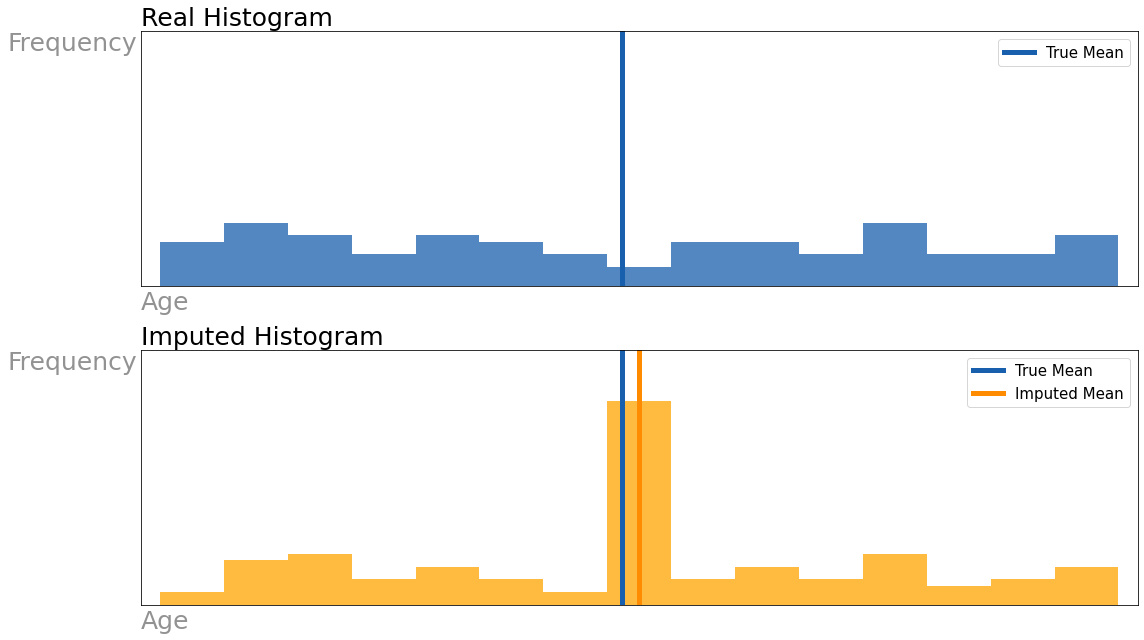

In [21]:
compare_histograms(imputed_column = income_missing['age_mean_imputed'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

### We are underestimating the variance here.


Why is this a bad thing?
- If we underestimate variance in a confidence interval, our confidence interval gets smaller for the same level of confidence!
    - Our results artificially look more precise... but only because we imputed the mean!
- If we underestimate the variance in a hypothesis test, our p-value will artificially get smaller.
    - Our p-value may look significant... but only because we imputed the mean!
    
# Since you have not accounted for the reason why data is missing, you are underestimating the variance

# How do you know if your data is better/worse?

# Compare MSE of income when dropped vs MSE of income when imputed.

# AKA RUN CROSS VALIDATION ON BOTH AND COMPARE MSE!!!!!!!!!!!

# THIS IS THE BACKBONE OF PROJECT 2!!

#### Median Imputation

In [36]:
# Let's impute missing values in the age column with the median
med_age = np.median(income_missing['age'].dropna())
med_age

40.5

In [37]:
income_missing['age_med_imputed'] = income_missing['age'].fillna(med_age)

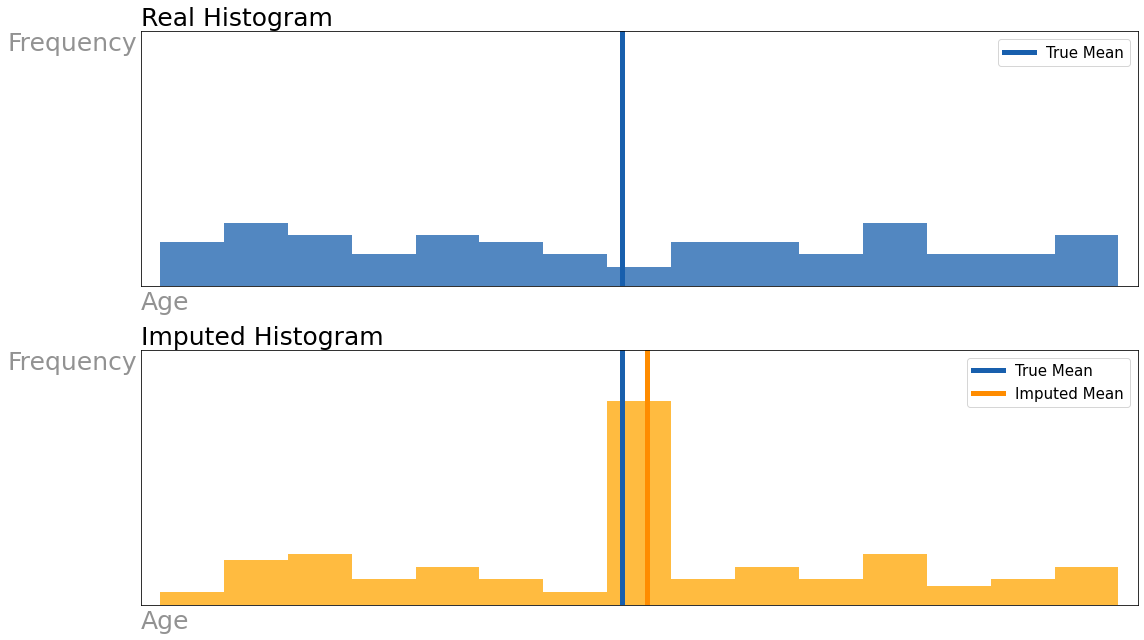

In [39]:
compare_histograms(imputed_column = income_missing['age_med_imputed'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

#### Mode Imputation

In [ ]:
# Let's impute missing values in the age column with the mode
mode_age = 

### Make your life easier -> Simple Imputer in sklearn

Note: Train-test-split BEFORE doing this if you are going to model later to avoid data leakage!

Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer).

In [41]:
# import simple imputer
from sklearn.impute import SimpleImputer

In [43]:
# re-load data
income_missing = pd.read_csv('data/income_missing.csv')

In [45]:
imp = SimpleImputer(strategy='mean')
imp.fit(income_missing) # only training data should be used to run fit
imp.transform(income_missing)

# Compare MSE of income when dropped vs MSE of income when imputed.

# AKA RUN CROSS VALIDATION ON BOTH AND COMPARE MSE!!!!!!!!!!!

# THIS IS THE BACKBONE OF PROJECT 2!!

array([[1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 5.65313613e+04],
       [2.00000000e+00, 5.80000000e+01, 1.00000000e+00, 9.30261825e+04],
       [0.00000000e+00, 4.90000000e+01, 1.00000000e+00, 4.26930108e+04],
       [0.00000000e+00, 4.40000000e+01, 1.00000000e+00, 8.36801282e+04],
       [1.00000000e+00, 2.60000000e+01, 0.00000000e+00, 2.88455208e+04],
       [1.00000000e+00, 2.60000000e+01, 1.00000000e+00, 2.48988409e+04],
       [2.00000000e+00, 2.20000000e+01, 1.00000000e+00, 6.71520081e+04],
       [2.00000000e+00, 5.50000000e+01, 1.00000000e+00, 3.50473735e+04],
       [5.00000000e+00, 4.40000000e+01, 1.00000000e+00, 1.72458697e+04],
       [1.00000000e+00, 3.95000000e+01, 1.00000000e+00, 7.57495292e+04],
       [2.00000000e+00, 3.95000000e+01, 1.00000000e+00, 5.71769502e+04],
       [4.00000000e+00, 3.95000000e+01, 1.00000000e+00, 8.86604764e+04],
       [1.00000000e+00, 3.95000000e+01, 0.00000000e+00, 6.70892603e+04],
       [2.00000000e+00, 3.95000000e+01, 0.00000000e

### Method 3: Single Regression Imputation

Train a model on the rows of your data that are fully observed.
- Suppose I’m missing income for some people, but have observed age and highest level of education for everybody.
- X = age and highest level of education, Y = income.
- Fit a model.
- For any “NA” value in a given column, replace “NA” with predicted value from that model.

**Pros**:
- Seems reasonable
- A little more nuanced than mean/median/mode imputation

**Cons**:
- Still distorts histogram
- Underestimates variance
- Should only be considered if data is MCAR or MAR.

In [2]:
# re-load data
income_missing = pd.read_csv('data/income_missing.csv') 

In [3]:
# Import linear regression
from sklearn.linear_model import LinearRegression

In [5]:
# Save new dataframe without any missing values
# We use income_new to impute null values
income_new = income_missing.dropna()

In [7]:
print(income_missing.isnull().sum())
print(income_missing.shape)

children      0
age          30
partnered     0
income        0
dtype: int64
(100, 4)


In [8]:
print(income_new.isnull().sum())
print(income_new.shape)

children     0
age          0
partnered    0
income       0
dtype: int64
(70, 4)


In [9]:
# Set up model
X = income_new[['partnered', 'children', 'income']]
y = income_new['age']

# Instantiate
model = LinearRegression()

# Fit
model.fit(X, y)

LinearRegression()

In [10]:
# save indices of missing values
missing_idx = income_missing.index[income_missing['age'].isnull()]
missing_idx

Int64Index([ 9, 10, 11, 12, 13, 16, 17, 19, 24, 27, 29, 30, 39, 42, 48, 52, 58,
            59, 60, 73, 77, 78, 79, 80, 83, 85, 89, 92, 94, 98],
           dtype='int64')

In [11]:
income_missing.columns

Index(['children', 'age', 'partnered', 'income'], dtype='object')

In [12]:
# Impute missing values with the prediciton from the model
income_missing['age_regression_imputed'] = [income_missing.loc[i,'age'] if i not in missing_idx
     else model.predict(pd.DataFrame(income_missing.loc[i,['children', 'partnered', 'income']]).T)[0]
     for i in range(income_missing.shape[0])]

In [13]:
income_missing.isnull().sum()

children                   0
age                       30
partnered                  0
income                     0
age_regression_imputed     0
dtype: int64

In [26]:
count = 0
for i in income_missing['age_regression_imputed']:
    if i.is_integer() == False:
        count +=1
print(count)

30


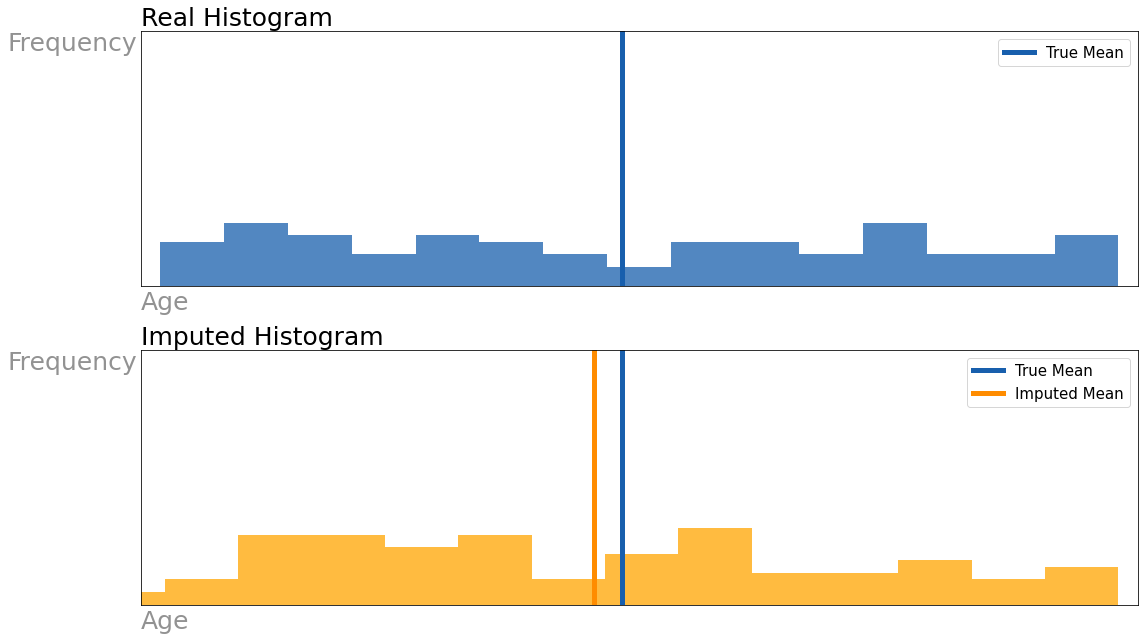

In [59]:
compare_histograms(imputed_column = income_missing['age_regression_imputed'],
                   original_column = income['age'],
                   x_label = 'Age',
                   y_label = 'Frequency')

![](../images/deterministic_imputation.png)

[source](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)

### Make your life easier -> Iterative Imputer in sklearn

Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer).

From [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer): 
> Note: This estimator is still experimental for now: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:

```python
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
```

Again, make sure to fit this only on training data if you are using this for a model (you can transform testing data).

In [1]:
# imports
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
# re-load data
income_missing = pd.read_csv('data/income_missing.csv') 

In [3]:
income_missing.columns

Index(['children', 'age', 'partnered', 'income'], dtype='object')

In [6]:
it_imp = IterativeImputer(
    estimator=LinearRegression()
)

it_imp.fit(income_missing)
it_imp.transform(income_missing)

array([[1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 5.65313613e+04],
       [2.00000000e+00, 5.80000000e+01, 1.00000000e+00, 9.30261825e+04],
       [0.00000000e+00, 4.90000000e+01, 1.00000000e+00, 4.26930108e+04],
       [0.00000000e+00, 4.40000000e+01, 1.00000000e+00, 8.36801282e+04],
       [1.00000000e+00, 2.60000000e+01, 0.00000000e+00, 2.88455208e+04],
       [1.00000000e+00, 2.60000000e+01, 1.00000000e+00, 2.48988409e+04],
       [2.00000000e+00, 2.20000000e+01, 1.00000000e+00, 6.71520081e+04],
       [2.00000000e+00, 5.50000000e+01, 1.00000000e+00, 3.50473735e+04],
       [5.00000000e+00, 4.40000000e+01, 1.00000000e+00, 1.72458697e+04],
       [1.00000000e+00, 4.23702913e+01, 1.00000000e+00, 7.57495292e+04],
       [2.00000000e+00, 3.89213434e+01, 1.00000000e+00, 5.71769502e+04],
       [4.00000000e+00, 4.65827320e+01, 1.00000000e+00, 8.86604764e+04],
       [1.00000000e+00, 4.47573889e+01, 0.00000000e+00, 6.70892603e+04],
       [2.00000000e+00, 4.38576886e+01, 0.00000000e

In [ ]:
# try it with the defaul model
income_missing = pd.read_csv('../data/income_missing.csv') 



### Method 4: Nearest Neighbors Imputation

Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer).

In [ ]:
# import it
from sklearn.impute import KNNImputer

In [ ]:
# re-load data
income_missing = pd.read_csv('../data/income_missing.csv') 

### Method 5: Multiple Imputation

If we want to account for the randomness in our data, we can fill in missing values with some amount of randomness/uncertainty.

Replacing an NA with one value treats things like we know the true value.

Therefore, we need to impute multiple times.
- We will make multiple copies (say 10) of our dataset.
- We will use [random regression imputation](https://statisticsglobe.com/regression-imputation-stochastic-vs-deterministic/) to generate one value for each NA in each dataset.
- Once each of our 10 datasets are complete, we will do our “final model” or “final analysis” on each dataset.
- We will then combine the results of our multiple models together, just like we aggregate results in an ensemble model.

![](../images/proper_imputation.png)


If you’re **generating predictions**, you can just average your predictions together in a regression problem or select the plurality class in a classification problem.

If your goal is to do **inference** (e.g. understand how X affects Y) and are fitting a linear model to each dataset, then you get a slope and y-intercept for each model.
- There are a set of tools, called Rubin’s rules, that will allow you to take the slopes and y-intercepts from each model and combine them together.
- Check out documentation in the repo if interested!

[IterativeImputer](https://scikit-learn.org/stable/modules/impute.html#multiple-vs-single-imputation) in sklearn can help with this!

### Missing Indicator Column

We can add a column about which values were imputed/missing and use that as a feature in our model. This can help when there is a pattern in what is missing and our target and may help our model.

See another example of this [here](https://nbviewer.jupyter.org/github/justmarkham/scikit-learn-tips/blob/master/notebooks/09_add_missing_indicator.ipynb).

There are several ways we can do this:
1. Set `add_indicator = True` in Simple Imputer or Iterative Imputer if you are using these:
```python
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(X)
```
2. Use the `MissingIndicator` transformer in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator).

In [ ]:
# re-load data
income_missing = pd.read_csv('../data/income_missing.csv') 

---
### To the slides!
---

### BONUS: Pattern Submodel Approach

Big Picture: We will break our dataset into subsets based on missingness pattern. We will then build one model on each subset, creating many different models.

![](./images/pattern_submodel.jpeg)

[image source](https://opendatascience.com/data-imputation-beyond-mean-median-and-mode/)

**Pros**:
- The pattern submodel method will outperform imputation methods when your data are NMAR, and will perform about as well as imputation methods when your data are MCAR or MAR.
- You can generate predictions for test observations containing missing data.
- It does not require missingness assumptions!

**Cons**:
- This is not a well-understood method for inference.

Read more about this method [here](https://academic.oup.com/biostatistics/article/21/2/236/5092384).

See an example of this [here](https://github.com/sarahmercaldo/MissingDataAndPrediction) - note that this example is done in R.